In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# membaca dataset
data = pd.read_csv("data.csv")
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [3]:
# melihat jumlah baris dan kolom
data.shape

(4600, 18)

In [4]:
# menampilkan deskriptif data
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
# hanya menampilkan angka, tanpa e+
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


In [6]:
# cek kolom price yang bernilai 0
data[data['price'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.00,3.00,1.75,1490,10125,1.00,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.00,4.00,2.75,2600,5390,1.00,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.00,6.00,2.75,3200,9200,1.00,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.00,5.00,3.50,3480,36615,2.00,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.00,5.00,1.50,1500,7112,1.00,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.00,4.00,4.00,3680,18804,2.00,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.00,2.00,2.50,2200,188200,1.00,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.00,4.00,2.25,2170,10500,1.00,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.00,5.00,4.50,4630,6324,2.00,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.00,5.00,4.00,4430,9000,2.00,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


In [7]:
# banyak data pada kolom price yang bernilai 0
data[data['price'] == 0].shape[0]

49

In [8]:
# mencari outlier dengan IQR(Interquartile Range)
# selisih kuartil-3(75%) dengan kuartil-1(25%)
iqr = data['price'].describe()['75%'] - data['price'].describe()['25%']

# mencari batas bawah
lower_bound = data['price'].describe()['25%'] - (1.5*iqr)

# mencari batas atas
upper_bound = data['price'].describe()['75%'] + (1.5*iqr)
print("IQR equals {}".format(iqr))
print("Lower bound of price is {}".format(lower_bound))
print("Upper bound of price is {}".format(upper_bound))

IQR equals 332087.5
Lower bound of price is -175256.25
Upper bound of price is 1153093.75


In [9]:
# mengambil data price > 0 dan <= batas atas
data_clean = data.copy()
data_clean = data[(data.price > 0) & (data.price <= upper_bound)]
data_clean.shape

(4311, 18)

In [10]:
# menampilkan deskriptif data kolom price
data_clean[['price']].describe()

,price
count,4311.00
mean,487456.90
std,215659.64
min,7800.00
25%,320000.00
50%,450000.00
75%,615000.00
max,1150000.00


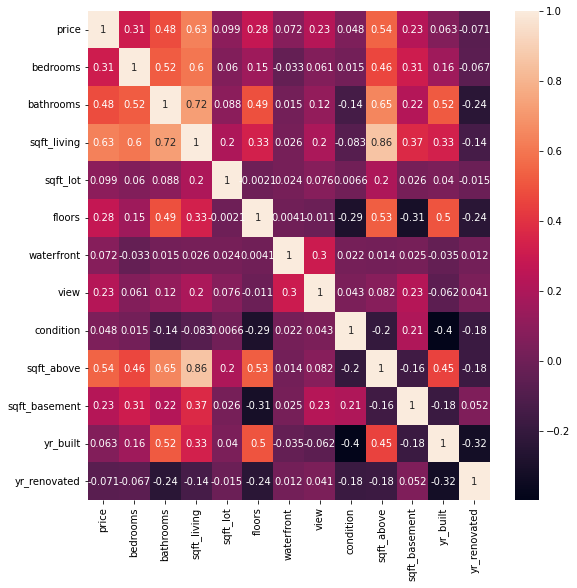

In [11]:
# melihat korelasi antar variabel
plt.figure(figsize=(9,9))
sns.heatmap(data_clean.corr(), annot=True)
plt.show()

In [12]:
# memilih kolom yang memiliki korelasi tinggi
data_clean = data_clean[['sqft_living','bathrooms','bedrooms','floors','price']]
data_clean.head(10)

,sqft_living,bathrooms,bedrooms,floors,price
0,1340,1.50,3.00,1.50,313000.00
2,1930,2.00,3.00,1.00,342000.00
3,2000,2.25,3.00,1.00,420000.00
4,1940,2.50,4.00,1.00,550000.00
5,880,1.00,2.00,1.00,490000.00
6,1350,2.00,2.00,1.00,335000.00
7,2710,2.50,4.00,2.00,482000.00
8,2430,2.50,3.00,1.00,452500.00
9,1520,2.00,4.00,1.50,640000.00
10,1710,1.75,3.00,1.00,463000.00


In [13]:
# membagi data
X = data_clean.drop('price', axis=1)
y = data_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

print("Total Data :", len(data_clean))
print("Banyaknya data training:", len(X_train))
print("Banyaknya data testing:", len(X_test))

Total Data : 4311
Banyaknya data training: 3448
Banyaknya data testing: 863


In [14]:
# memodelkan dan melakukan prediksi
model = LinearRegression()

model.fit(X_train, y_train)
model.predict(X_test)

array([ 485354.69817553,  441835.3076801 ,  453789.98520846,
        415049.11850156,  473551.53971655,  550880.38328669,
        413405.93671759,  743722.90407821,  484311.20643497,
        376271.3433367 ,  761396.97759918,  303086.79083996,
        328005.09496555,  813657.50395897,  303050.37988799,
        381389.67851161,  500711.2096849 ,  358078.14521803,
        480761.22764946,  487336.32057162,  487188.17576712,
        623019.44055225,  613792.21677726,  542145.59897988,
        494320.67251921,  549595.84047647,  579162.1069507 ,
        465519.82425751,  354604.86010735,  392148.84772404,
        398349.0890821 ,  433392.329705  ,  555329.58077914,
        511580.10925923,  365250.92469298,  351466.6413439 ,
        498208.59441084,  402533.16537237,  655856.35551008,
        625225.76621731,  358339.39464932,  572548.7347963 ,
        414078.44866495,  268979.67738198,  341939.39139939,
        471049.42194848,  545650.81176524,  603705.5595122 ,
        313659.53601565,

In [15]:
# melihat koefisien dan intersep
print(model.coef_)
print(model.intercept_)

[   179.31948687   5527.72941071 -28018.60595244  23832.52617155]
170132.9928929808


In [16]:
# evaluasi
print("Root MSE dari model ini {}".format(np.sqrt(mean_squared_error(y_test,model.predict(X_test)))))
print("R2 score dari model ini {}".format((r2_score(y_test,model.predict(X_test)))))

Root MSE dari model ini 161854.5292971274
R2 score dari model ini 0.3675004503026602


In [17]:
# membandingkan y_test dengan predisksi
pd.DataFrame({'y_test':y_test, 'prediction':model.predict(X_test)})

,y_test,prediction
1591,350000.00,485354.70
2164,240000.00,441835.31
1890,532000.00,453789.99
2335,405000.00,415049.12
687,607500.00,473551.54
...,...,...
1986,359800.00,548116.52
3454,755000.00,625448.74
900,482500.00,406192.87
2397,706000.00,465817.98


In [18]:
data_clean.to_csv("Data Clean.csv",index=False)